In [1]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('titanic.csv')

In [5]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [6]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'passengers travellinng with')

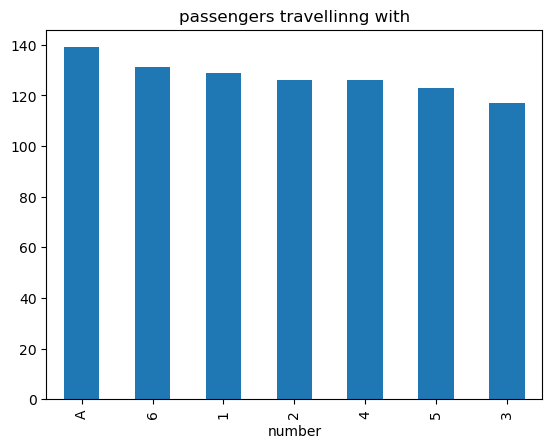

In [7]:
fig =  df['number'].value_counts().plot.bar()
fig.set_title('passengers travellinng with')
    

In [8]:
## extract  numerical part  
df['number_numerical']= pd.to_numeric(df['number'],errors='coerce',downcast='integer')

In [9]:
## extract categorical part
df['number_categorical']= np.where(df['number_numerical'].isnull(),df['number'],np.nan)

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [11]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
df['cabin_nums']=df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat']= df['Cabin'].str[0] # capture the first letter

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_nums,cabin_cat,cabin_nums
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C,85
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C,123
4,NaN,373450,A,0,NaN,A,NaN,NaN,NaN


In [16]:
df['cabin_cat'].value_counts()

cabin_cat
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

<Axes: xlabel='cabin_cat'>

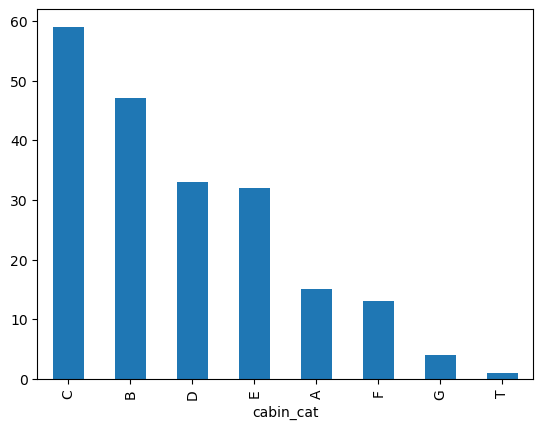

In [19]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [18]:
df['cabin_nums'].value_counts()

cabin_nums
33     7
6      6
101    5
22     5
20     5
      ..
111    1
21     1
12     1
14     1
148    1
Name: count, Length: 92, dtype: int64

In [20]:
## extract the last bit of ticket as number
df['ticket_num']= df['Ticket'].apply(lambda s:s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],errors='coerce',downcast='integer')

## extract the first part of the ticket as a category
df['ticket_cat']=df['Ticket'].apply(lambda s:s.split()[0])
df['ticket)cat']=np.where(df['ticket_cat'].str.isdigit(),np.nan,df['ticket_cat'])

df.head(20)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_nums,cabin_cat,cabin_nums,ticket_num,ticket_cat,ticket)cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,NaN,21171.0,A/5,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,85,17599.0,PC,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,NaN,3101282.0,STON/O2.,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,123,113803.0,113803,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,NaN,373450.0,373450,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,NaN,330877.0,330877,NaN
6,E46,17463,2,0,2.0,NaN,46,E,46,17463.0,17463,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,NaN,349909.0,349909,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,NaN,347742.0,347742,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,NaN,237736.0,237736,NaN
